# Armenia Data Setup

In [ ]:
# --- Install required packages (run once in the notebook) ---
#!pip install pandas imageio numpy rasterio geopandas cartopy matplotlib

^C


^C


In [ ]:

# --- System and file handling ---
import os
import pandas as pd
import imageio

# --- Numerical and array operations ---
import numpy as np

# --- Raster handling ---
import rasterio
from rasterio.plot import show
from rasterio.windows import from_bounds

# --- Geo-spatial handling ---
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Plotting ---
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm

data_dir = "spei_yearly"

In [ ]:
records = []

for file in os.listdir(data_dir):
    if file.endswith('.tif'):
        file_path = os.path.join(data_dir, file)
        with rasterio.open(file_path) as src:
            img = src.read(1)  # Read the first band
            records.append({
                'folder': data_dir,
                'file': file,
                'data': img
            })

df_tiffs = pd.DataFrame(records)
df_tiffs.head()

,folder,file,data
0,spei_yearly,1993_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,spei_yearly,1994_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,spei_yearly,1995_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,spei_yearly,1996_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,spei_yearly,1997_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


In [ ]:
df_tiffs

,folder,file,data
0,spei_yearly,1993_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,spei_yearly,1994_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,spei_yearly,1995_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,spei_yearly,1996_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,spei_yearly,1997_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
5,spei_yearly,1998_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
6,spei_yearly,1999_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
7,spei_yearly,2000_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
8,spei_yearly,2001_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
9,spei_yearly,2002_12.tif,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


### Only plot the Data

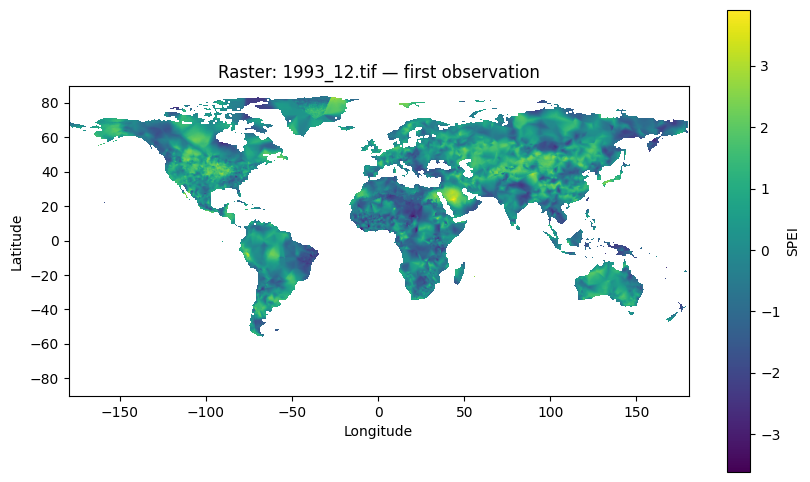

Raster geographic bounds (minx, maxx, miny, maxy): [-179.75, 180.25, -90.25, 89.75]


In [ ]:
# --- Pick the first raster observation ---
first_row = df_tiffs.iloc[0]
img = first_row['data']
folder = first_row['folder']
file = first_row['file']
file_path = os.path.join(data_dir, file)

# --- Reopen raster to get transform and CRS ---
with rasterio.open(file_path) as src:
    transform = src.transform
    crs = src.crs
    # Compute geographic bounds
    h, w = src.height, src.width
    minx, miny, maxx, maxy = rasterio.transform.array_bounds(h, w, transform)
    extent = [minx, maxx, miny, maxy]

# --- Mask invalid values ---
masked = np.ma.masked_invalid(img)

# --- Plot raster ---
plt.figure(figsize=(10, 6))
plt.imshow(masked, origin='upper', extent=extent, cmap='viridis')
plt.colorbar(label='SPEI')
plt.title(f"Raster: {file} — first observation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


plt.show()

# --- Print raster extent info ---
print("Raster geographic bounds (minx, maxx, miny, maxy):", extent)


### Plot armenia Shapefle

Loaded 11 features
Columns: ['source', 'id', 'name', 'geometry']
CRS: EPSG:4326


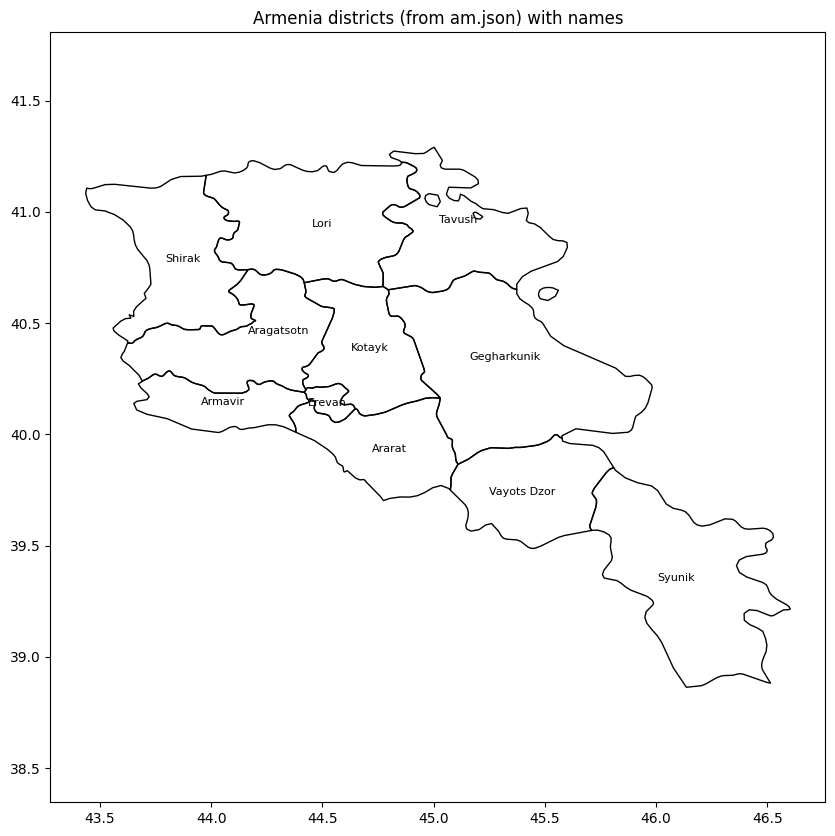

In [ ]:
# Load Armenia districts from the GeoJSON and plot each district name
import geopandas as gpd
import matplotlib.pyplot as plt

# Read GeoJSON (am.json) which uses lon/lat (EPSG:4326)
gdf = gpd.read_file('armenia_shapefile/am.json')
print('Loaded', len(gdf), 'features')
print('Columns:', gdf.columns.tolist())

# Ensure CRS is set to EPSG:4326 if missing
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
print('CRS:', gdf.crs)

# Create a simple plot and label each district using a representative point (keeps label inside polygon)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', facecolor='none')

for _, row in gdf.iterrows():
    geom = row.geometry
    if geom is None or geom.is_empty:
        continue
    pt = geom.representative_point()  # point guaranteed inside the polygon
    x, y = pt.x, pt.y
    label = str(row.get('name', ''))
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

ax.set_title('Armenia districts (from am.json) with names')
plt.axis('equal')
plt.show()

# Keep gdf available under a conventional name for later cells
arm_gdf = gdf.copy()

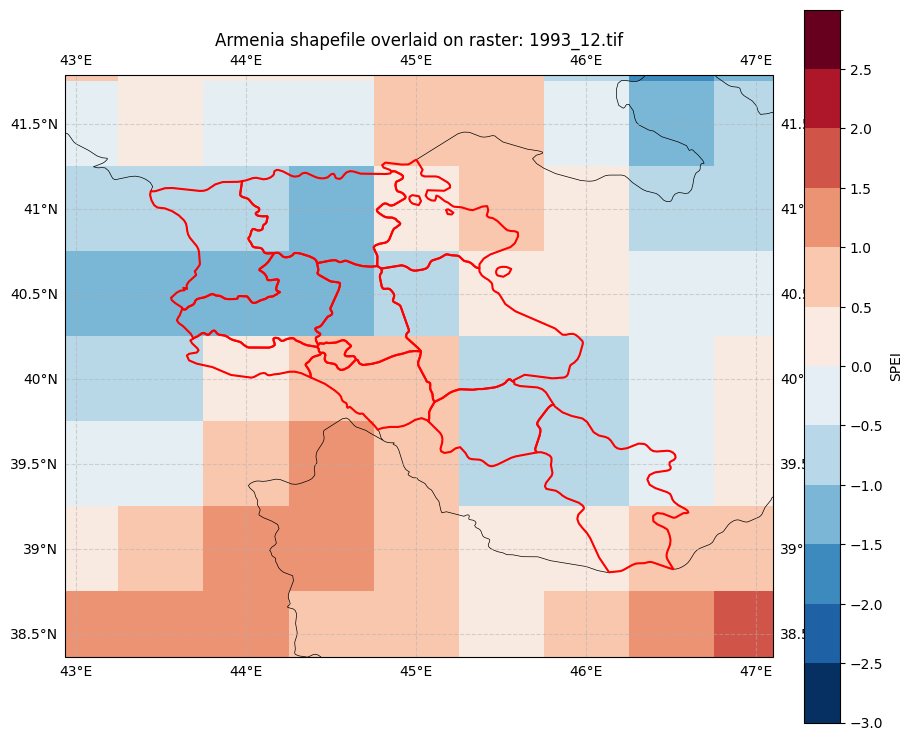

In [ ]:
# Plot Armenia shapefile and the first GeoTIFF together (WGS84 / PlateCarree)
import cartopy.crs as ccrs

# Ensure arm_gdf has a CRS (assume EPSG:4326 if missing)
if arm_gdf.crs is None:
    arm_gdf = arm_gdf.set_crs(epsg=4326)

# Use first raster already loaded in variables (img, transform, masked, extent)
# extent is [minx, maxx, miny, maxy] in degrees (WGS84)
raster_extent = extent

# Compute a tight map extent from the Armenia shapefile with a small buffer
minx, miny, maxx, maxy = arm_gdf.total_bounds
buffer_deg = 0.5
map_extent = [minx - buffer_deg, maxx + buffer_deg, miny - buffer_deg, maxy + buffer_deg]

#Check if correct mapping
#map_extent = [-179.5, 179.5, -89.5, 89.5]

# Create figure with PlateCarree projection (lon/lat)
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot raster (use existing cmap and norm)
im = ax.imshow(masked, origin='upper', extent=raster_extent,
               transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

# Overlay Armenia shapefile geometries
ax.add_geometries(
    arm_gdf.geometry,
    crs=ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='red',
    linewidth=1.5,
    zorder=3
)

# Map decorations
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, linestyle='--', alpha=0.5)

# Zoom to Armenia
ax.set_extent(map_extent, crs=ccrs.PlateCarree())

# Colorbar and title
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04, ticks=bounds[:-1])
cbar.set_label('SPEI')
ax.set_title(f"Armenia shapefile overlaid on raster: {file}")

plt.show()

# Calculate Distict Averages

In [ ]:
# --- Crop the first raster to Armenia bounds (EPSG:3035) - placed under 'Calculate Distict Averages' ---
import os
import numpy as np
import rasterio
from rasterio.windows import from_bounds

# Ensure df_tiffs exists
if 'df_tiffs' not in globals():
    raise RuntimeError('df_tiffs not found - run the raster-loading cells first')

# Use the first TIFF in df_tiffs
row = df_tiffs.iloc[0]
file_path = os.path.join(row['folder'], row['file'])

# Armenia bounds in EPSG:3035 (meters) - adjust if you need a different extent
armenia_bounds = [38, 42, 43, 47]  # minx, maxx, miny, maxy

# Open raster and crop to armenia_bounds (intersect to avoid WindowError)
with rasterio.open(file_path) as src:
    raster_bounds = src.bounds
    # intersect
    minx = max(raster_bounds.left, armenia_bounds[0])
    maxx = min(raster_bounds.right, armenia_bounds[1])
    miny = max(raster_bounds.bottom, armenia_bounds[2])
    maxy = min(raster_bounds.top, armenia_bounds[3])

    if minx >= maxx or miny >= maxy:
        raise RuntimeError('Raster does not overlap the Armenia crop bounds')

    window = from_bounds(minx, miny, maxx, maxy, transform=src.transform)
    img_cropped = src.read(1, window=window)
    transform_cropped = src.window_transform(window)
    crs = src.crs

# Mask invalid values (NaNs)
masked_cropped = np.ma.masked_invalid(img_cropped)

# Compute extent for plotting: [minx, maxx, miny, maxy]
h, w = img_cropped.shape
minx2, miny2, maxx2, maxy2 = rasterio.transform.array_bounds(h, w, transform_cropped)
extent_cropped = [minx2, maxx2, miny2, maxy2]

print('Cropped raster shape:', img_cropped.shape)
print('Cropped extent (minx, maxx, miny, maxy):', extent_cropped)
print('Cropped CRS:', crs)


Cropped raster shape: (8, 8)
Cropped extent (minx, maxx, miny, maxy): [38.0, 42.0, 43.0, 47.0]
Cropped CRS: EPSG:4326


In [ ]:
arm_gdf

,source,id,name,geometry
0,https://simplemaps.com,AMTV,Tavush,"POLYGON ((45.37359 40.6513, 45.37333 40.65137,..."
1,https://simplemaps.com,AMLO,Lori,"POLYGON ((44.85382 41.22351, 44.85393 41.2235,..."
2,https://simplemaps.com,AMSH,Shirak,"POLYGON ((43.97776 41.16454, 43.97755 41.16315..."
3,https://simplemaps.com,AMGR,Gegharkunik,"MULTIPOLYGON (((44.79657 40.65008, 44.91543 40..."
4,https://simplemaps.com,AMVD,Vayots Dzor,"POLYGON ((45.10953 39.86578, 45.15686 39.8893,..."
5,https://simplemaps.com,AMSU,Syunik,"POLYGON ((45.70907 39.56842, 45.70892 39.5687,..."
6,https://simplemaps.com,AMAR,Ararat,"POLYGON ((45.02979 40.16334, 45.02483 40.1346,..."
7,https://simplemaps.com,AMAG,Aragatsotn,"POLYGON ((44.16581 40.74054, 44.17883 40.74273..."
8,https://simplemaps.com,AMAV,Armavir,"POLYGON ((44.44047 40.15336, 44.43825 40.14489..."
9,https://simplemaps.com,AMKT,Kotayk,"POLYGON ((44.77249 40.66517, 44.79657 40.65008..."


In [ ]:
# Robust per-district means: reproject districts to raster CRS, crop using district bounds, include touching pixels
from rasterio.features import geometry_mask
import pandas as pd
import numpy as np

# Preconditions
if 'arm_gdf' not in globals():
    raise RuntimeError('arm_gdf not found - run the am.json cell first')
if 'df_tiffs' not in globals():
    raise RuntimeError('df_tiffs not found - run the raster-loading cell first')

# Use the GeoDataFrame we created earlier
districts_src = arm_gdf.copy()

# pick a sensible name column (exclude geometry)
possible_name_cols = ['WOREDANAME', 'WOREDANO_', 'name', 'Name', 'NAME']
name_col = next((c for c in possible_name_cols if c in districts_src.columns), None)
if name_col is None:
    non_geom = [c for c in districts_src.columns if c.lower() != 'geometry']
    name_col = non_geom[0] if non_geom else None

# Use the first TIFF (same as cropping cell)
row = df_tiffs.iloc[0]
file_path = os.path.join(row['folder'], row['file'])

# Open raster, reproject districts to raster CRS, compute a tight crop window from districts bounds
with rasterio.open(file_path) as src:
    raster_crs = src.crs
    print('Raster CRS:', raster_crs)
    try:
        districts = districts_src.to_crs(raster_crs)
    except Exception:
        # if districts had no CRS, assume EPSG:4326 then reproject
        if districts_src.crs is None:
            districts_src = districts_src.set_crs(epsg=4326)
        districts = districts_src.to_crs(raster_crs)

    # compute bounds in raster CRS: (minx, miny, maxx, maxy)
    minx, miny, maxx, maxy = districts.total_bounds
    # add a small buffer (in raster units) to ensure full coverage
    xbuf = (maxx - minx) * 0.02
    ybuf = (maxy - miny) * 0.02
    minx -= xbuf
    maxx += xbuf
    miny -= ybuf
    maxy += ybuf

    window = from_bounds(minx, miny, maxx, maxy, transform=src.transform)
    arr = src.read(1, window=window)
    transform_cropped = src.window_transform(window)
    crs = src.crs

# Mask invalid values
masked_cropped = np.ma.masked_invalid(arr)

# Compute mean SPEI per district using all_touched=True so touching pixels count
district_means = []
for idx, row in districts.iterrows():
    geom = [row.geometry]
    mask = geometry_mask(geom, out_shape=masked_cropped.shape, transform=transform_cropped, invert=True, all_touched=True)
    vals = masked_cropped[mask]
    if hasattr(vals, 'compressed'):
        valid = vals.compressed()
    else:
        valid = np.array(vals).ravel()
    mean_value = np.nan if valid.size == 0 else float(valid.mean())
    n_pix = int(valid.size)
    label = row[name_col] if name_col in row.index else f'district_{idx}'
    district_means.append({'district_name': label, 'mean_spei': mean_value, 'n_pixels': n_pix})

df_districts_spei = pd.DataFrame(district_means)
df_districts_spei = df_districts_spei.sort_values('district_name').reset_index(drop=True)
df_districts_spei.head()

Raster CRS: EPSG:4326


,district_name,mean_spei,n_pixels
0,Aragatsotn,-0.420087,6
1,Ararat,0.819274,5
2,Armavir,0.236893,3
3,Erevan,0.823096,1
4,Gegharkunik,-0.375255,6


In [ ]:
# Loop over all SPEI rasters, compute mean per district (include touching pixels), store by filename
from rasterio.features import geometry_mask
import pandas as pd
import numpy as np
from tqdm import tqdm

# Preconditions
if 'df_tiffs' not in globals():
    raise RuntimeError('df_tiffs not found - run the raster-loading cell first')
if 'arm_gdf' not in globals():
    raise RuntimeError('arm_gdf not found - run the am.json cell first')

# Detect a sensible name column on the arm_gdf
possible_name_cols = ['WOREDANAME', 'WOREDANO_', 'name', 'Name', 'NAME']
name_col = next((c for c in possible_name_cols if c in arm_gdf.columns), None)
if name_col is None:
    non_geom = [c for c in arm_gdf.columns if c.lower() != 'geometry']
    name_col = non_geom[0] if non_geom else None

# Use the first raster to determine raster CRS and prepare district geometries in that CRS
first_row = df_tiffs.iloc[0]
first_fp = os.path.join(first_row['folder'], first_row['file'])
with rasterio.open(first_fp) as src:
    raster_crs = src.crs

# Reproject districts to raster CRS (assume arm_gdf is EPSG:4326 if unset)
districts_base = arm_gdf.copy()
if districts_base.crs is None:
    districts_base = districts_base.set_crs(epsg=4326)
districts_ref = districts_base.to_crs(raster_crs)
# compute tight bounds once in raster CRS and add small buffer
minx, miny, maxx, maxy = districts_ref.total_bounds
xbuf = (maxx - minx) * 0.02
ybuf = (maxy - miny) * 0.02
minx0, miny0, maxx0, maxy0 = (minx - xbuf, miny - ybuf, maxx + xbuf, maxy + ybuf)

# Prepare results list
all_records = []
# iterate with a progress bar
for _, trow in tqdm(df_tiffs.iterrows(), total=len(df_tiffs), desc='Processing rasters'):
    fp = os.path.join(trow['folder'], trow['file'])
    with rasterio.open(fp) as src:
        # if raster CRS differs, reproject districts for this raster
        if src.crs != raster_crs:
            districts = districts_base.to_crs(src.crs)
            minx_s, miny_s, maxx_s, maxy_s = districts.total_bounds
            xbuf_s = (maxx_s - minx_s) * 0.02
            ybuf_s = (maxy_s - miny_s) * 0.02
            win = from_bounds(minx_s - xbuf_s, miny_s - ybuf_s, maxx_s + xbuf_s, maxy_s + ybuf_s, transform=src.transform)
        else:
            districts = districts_ref
            win = from_bounds(minx0, miny0, maxx0, maxy0, transform=src.transform)
        arr = src.read(1, window=win)
        transform_win = src.window_transform(win)
    masked = np.ma.masked_invalid(arr)

    # compute per-district means for this raster
    for idx_d, drow in districts.iterrows():
        geom = [drow.geometry]
        mask = geometry_mask(geom, out_shape=masked.shape, transform=transform_win, invert=True, all_touched=True)
        vals = masked[mask]
        if hasattr(vals, 'compressed'):
            valid = vals.compressed()
        else:
            valid = np.array(vals).ravel()
        mean_val = np.nan if valid.size == 0 else float(valid.mean())
        n_pix = int(valid.size)
        label = drow.get(name_col, f'district_{idx_d}') if name_col is not None else f'district_{idx_d}'
        all_records.append({'file': trow['file'], 'district_name': label, 'mean_spei': mean_val, 'n_pixels': n_pix})

# Convert to DataFrame and optionally extract date from filename
df_all_districts_spei = pd.DataFrame(all_records)
# try to parse a date if the filename format allows (same approach used elsewhere)
try:
    df_all_districts_spei['date'] = pd.to_datetime(df_all_districts_spei['file'].str.split('_').str[3], format='%Y%m%d')
except Exception:
    pass

# Save results
df_all_districts_spei.to_csv('df_all_districts_spei.csv', index=False)
print('Saved df_all_districts_spei.csv with', len(df_all_districts_spei), 'rows')
df_all_districts_spei.head()

Processing rasters: 100%|██████████| 23/23 [00:01<00:00, 15.64it/s]


Saved df_all_districts_spei.csv with 253 rows


,file,district_name,mean_spei,n_pixels,date
0,1993_12.tif,Tavush,-0.301226,6,NaT
1,1993_12.tif,Lori,-0.789238,5,NaT
2,1993_12.tif,Shirak,-0.963141,4,NaT
3,1993_12.tif,Gegharkunik,-0.375255,6,NaT
4,1993_12.tif,Vayots Dzor,0.008163,4,NaT
